In [37]:
import numpy as np
import scipy as sp
import scipy.stats as sps
import matplotlib.pyplot as plt
import pandas as pd 
import time
%matplotlib inline

mySeed = 15

assetMatrix = [['A',0.10,0.20],
               ['B',0.05,0.15],
               ['C',0.07,0.25]]

for i in range(10):
    asset = ['D'+str(i),np.random.normal(0.1,0.05),np.random.normal(0.3,0.1)]
    assetMatrix.append(asset)
    
df = pd.DataFrame(assetMatrix, columns = ['Name', 'Return','Risk'])

print(df)

   Name    Return      Risk
0     A  0.100000  0.200000
1     B  0.050000  0.150000
2     C  0.070000  0.250000
3    D0  0.088654  0.298467
4    D1  0.125031  0.374130
5    D2  0.060989  0.216848
6    D3  0.141769  0.335404
7    D4  0.162462  0.491626
8    D5  0.101671  0.378672
9    D6  0.101386  0.379107
10   D7  0.130125  0.273870
11   D8  0.069380  0.398258
12   D9  0.113921  0.422402


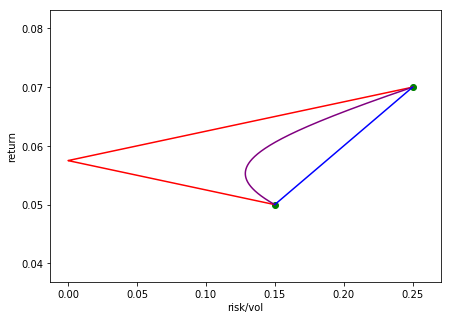

In [38]:
def allocatedRiskReturn(returns,risks,correlation=0):
    allocation       = np.linspace(0,1,10000)
    returnA,returnB  = returns
    riskA,riskB      = risks
    allocatedReturns = returnA*          allocation  + returnB*         (1-allocation)
    #volatility = std of returns
    covarianceAB     = correlation*riskA*riskB
    allocatedRisks   = np.sqrt(riskA**2  *np.square(allocation) + riskB**2  *np.square(1-allocation) + 2*allocation*(1-allocation)*covarianceAB)
    return allocatedReturns, allocatedRisks


fig = plt.figure(figsize = (7,5))
ax1 = plt.subplot(1,1,1)

returns = df['Return'][[1,2]]
risks   = df['Risk'][[1,2]]

ax1 = plt.scatter(risks,returns,color='green')
plt.xlabel('risk/vol')
plt.ylabel('return')


for corr in [-1,0,1]:
    col = (1-0.5*(corr+1),0,0.5*(corr+1))
    allocatedReturns,allocatedRisks = allocatedRiskReturn(returns,risks,corr)
    ax1 = plt.plot(allocatedRisks,allocatedReturns, color=col)

plt.show()

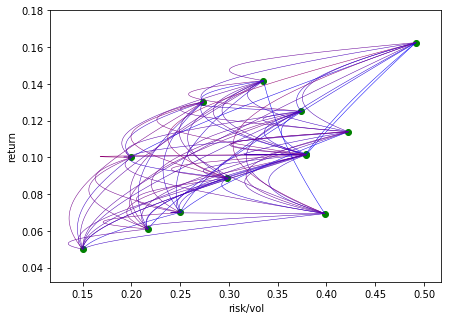

In [48]:
fig = plt.figure(figsize = (7,5))
ax1 = plt.subplot(1,1,1)
ax1 = plt.scatter(df['Risk'],df['Return'],color='green')
plt.xlabel('risk/vol')
plt.ylabel('return')

for a in range(len(df)):
    for b in range(a):
        for corr in np.random.normal(0.4,0.25,1):
            col = (1-0.5*(corr+1),0,0.5*(corr+1))
            allocatedReturns,allocatedRisks = allocatedRiskReturn(df['Return'][[a,b]],df['Risk'][[a,b]],corr)
            ax1 = plt.plot(allocatedRisks,allocatedReturns, color=col, linewidth=0.5)

plt.show()

In [11]:
len(df)

3